In [5]:
!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/fourier_transform/fspecial/disk.txt

!wget https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/fourier_transform/fspecial/unsharp.txt

--2020-09-02 16:50:46--  https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/fourier_transform/fspecial/disk.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3999 (3.9K) [text/plain]
Saving to: ‘disk.txt.1’

disk.txt.1          100%[===================>]   3.91K  --.-KB/s    in 0s      

2020-09-02 16:50:46 (70.6 MB/s) - ‘disk.txt.1’ saved [3999/3999]

--2020-09-02 16:50:46--  https://raw.githubusercontent.com/newtonis/tps_imagenes/master/tp2/fourier_transform/fspecial/unsharp.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def read_filter_coeff_matrix(filename):

    f = open(filename, "r")
    disk = []
    arr = []
    for i,x in enumerate(f):
        if i == 0:
            m,n = [int(el) for el in x.split(" ")]
            disk = np.zeros((m,n))
        else:
            arr.append(float(x))
        
    for i in range(m):
        for j in range(n):
            disk[i][j] = arr[i*m+j]
    return disk

# Example 1 con  h=[0 1/6 0 ; 1/6 1/3 1/6 ; 0 1/6 0 ];

Creamos una impulso unitario y lo graficamos

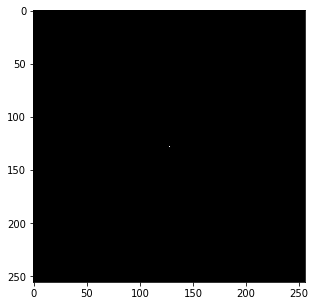

In [7]:
import numpy as np
N = 256
plt.figure(figsize =(5, 5)) 
img_ = np.zeros((N,N)) # imagen de 256x256
img_[N//2,N//2] = 1 # impulso
plt.imshow(img_,cmap='gray', vmin=0, vmax=1) # graficamos impulso

Hacemos zoom para ver la convolucion del filtro con la delta. Si lo vemos desde lejos no podemos apreciar nada (lo vemos como un punto aproximadamente).
La convolucion debe darnos el filtro.

Los valores en el zoom son:
[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.16666667 0.         0.        ]
 [0.         0.16666667 0.33333333 0.16666667 0.        ]
 [0.         0.         0.16666667 0.         0.        ]
 [0.         0.         0.         0.         0.        ]]


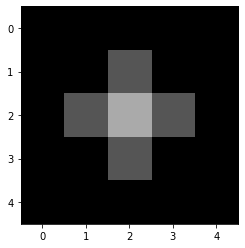

In [8]:
from scipy import signal
h = np.array([ [0,1/6, 0], [1/6, 1/3, 1/6], [0, 1/6 , 0] ])

conv_image = signal.convolve2d(img_, h, boundary='symm', mode='same')
low = N//2 - 2
high = N//2 + 2+1

zoom = conv_image[low:high,low:high]
print("Los valores en el zoom son:")
print(zoom)
plt.imshow(zoom,cmap='gray', vmin=0, vmax=0.5) 

Realizamos un plot del modulo del espectro

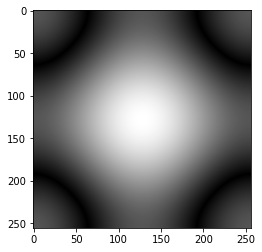

In [9]:
spectrum = np.fft.fft2(conv_image)
module = np.abs(np.fft.fftshift(spectrum))
max_val = np.max(module)
plt.imshow(module,cmap='gray', vmin=0, vmax=max_val) 

Realizamos un plot 3D del modulo del espectro

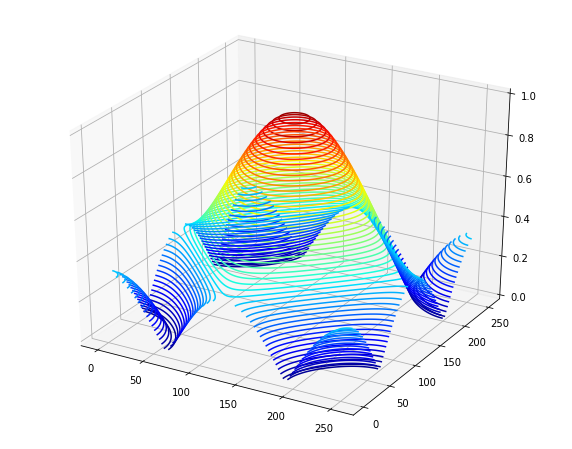

In [10]:
plt.figure(figsize =(10, 8)) 
ax = plt.axes(projection='3d')
m,n = module.shape
X = np.array(range(m))
Y = np.array(range(n))
Z = module
ax.contour3D(X, Y, module, 50, cmap='jet')

Aplicamos logaritmo porque la respuesta perceptual de la vision es de caracteristica logaritmica

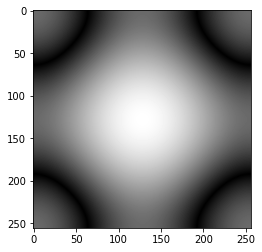

In [11]:
spectrum = np.fft.fft2(conv_image)
module = np.log10(1+np.abs(np.fft.fftshift(spectrum))) # 1+ para que no haga np.log(0)
max_val = np.max(module)
plt.imshow(module,cmap='gray', vmin=0, vmax=max_val) 

# Example 1 con h = disk (low pass)

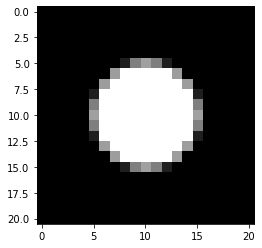

In [26]:
h = read_filter_coeff_matrix("disk.txt")

conv_image = signal.convolve2d(img_, h, boundary='symm', mode='same')
low = N//2 - 10
high = N//2 + 10+1

zoom = conv_image[low:high,low:high]
plt.imshow(zoom,cmap='gray', vmin=0, vmax=0.01) 

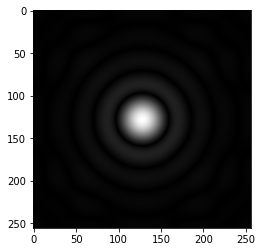

In [13]:
spectrum = np.fft.fft2(conv_image)
module = np.abs(np.fft.fftshift(spectrum))
max_val = np.max(module)
plt.imshow(module,cmap='gray', vmin=0, vmax=max_val) 

Vemos que el plot tiene sentido, pondera el centro por sobre los pixeles de afuera (pasa bajos)

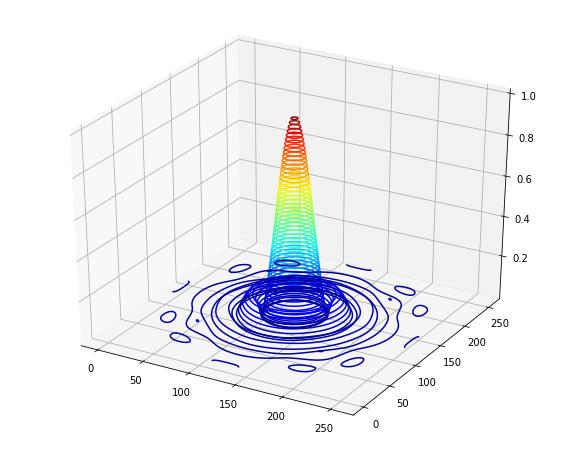

In [14]:
plt.figure(figsize =(10, 8)) 
ax = plt.axes(projection='3d')
m,n = module.shape
X = np.array(range(m))
Y = np.array(range(n))
Z = module
ax.contour3D(X, Y, module, 50, cmap='jet')

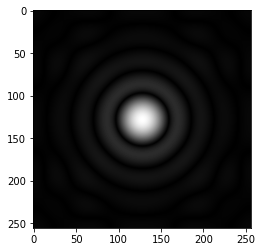

In [15]:
spectrum = np.fft.fft2(conv_image)
module = np.log10(1+np.abs(np.fft.fftshift(spectrum))) # 1+ para que no haga np.log(0)
max_val = np.max(module)
plt.imshow(module,cmap='gray', vmin=0, vmax=max_val) 

# Example 1 con unsharp (highpass)

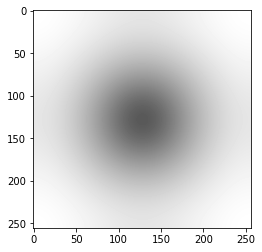

In [32]:
h = read_filter_coeff_matrix("unsharp.txt")

conv_image = signal.convolve2d(img_, h, boundary='symm', mode='same')

spectrum = np.fft.fft2(conv_image)
module = np.log10(1+np.abs(np.fft.fftshift(spectrum))) # 1+ para que no haga np.log(0)
max_val = np.max(module)
plt.imshow(module,cmap='gray', vmin=0, vmax=max_val) 

Aqui de nuevo vemos que el plot tiene sentido, pondera los valores de afuera por sobre los pixeles del centro (pasa altos)

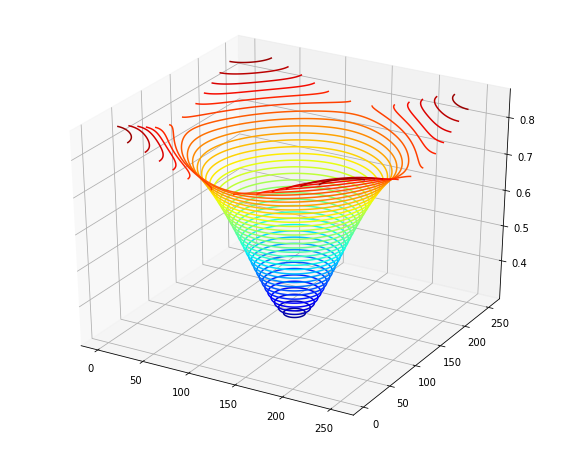

In [33]:
plt.figure(figsize =(10, 8)) 
ax = plt.axes(projection='3d')
m,n = module.shape
X = np.array(range(m))
Y = np.array(range(n))
Z = module
ax.contour3D(X, Y, module, 50, cmap='jet')

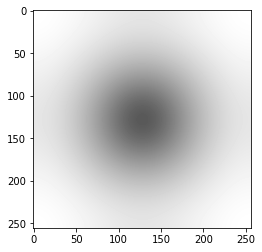

In [34]:
spectrum = np.fft.fft2(conv_image)
module = np.log10(1+np.abs(np.fft.fftshift(spectrum))) # 1+ para que no haga np.log(0)
max_val = np.max(module)
plt.imshow(module,cmap='gray', vmin=0, vmax=max_val) 